In [747]:
import numpy as np

In [748]:
x = np.load('First.npy',allow_pickle=True).item()

In [749]:
y = x['xmax']
y1 = x['X_o']
y2 = x['chi2_xmax']

In [750]:
import matplotlib.pylab as plt

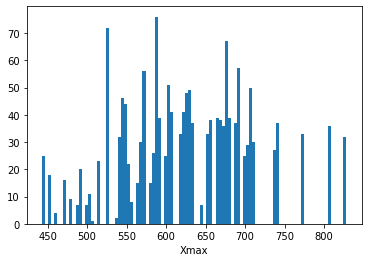

In [751]:
plt.hist(y,bins=100)
plt.xlabel('Xmax')
plt.savefig('Xmax.png')

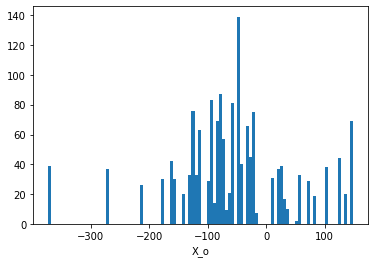

In [752]:
plt.hist(y1,bins=100)
plt.xlabel('X_o')
plt.savefig('X_o.png')

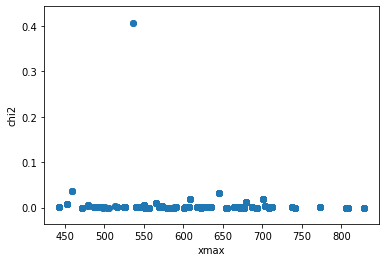

[0.0050964  0.0050964  0.0050964  ... 0.01937622 0.01937622 0.01937622]


In [755]:
plt.scatter(y,y2)
plt.xlabel('xmax')
plt.ylabel('chi2')
plt.show()
print(y2)

In [695]:
depth = x['depth']
N = x['sum_value']
depth_prediction = x['depth_reduced']
N_prediction = x['sum_value_prediction']

In [696]:
def filter(x,y,trial):
    value = zip(x[trial],y[trial]/max(y[trial]))
    output = []
    for i in value:
        if i[1] == 0:
            continue
        else:
            output.append(i)
    return list(zip(*output))[0],list(zip(*output))[1]

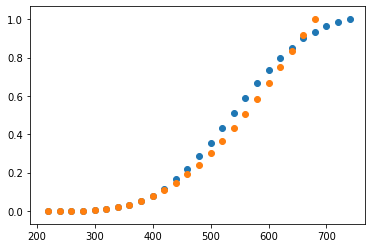

In [726]:
trial = 106
plot_values= filter(depth,N,trial)
plot_values2 = filter(depth_prediction,N_prediction,trial)
plt.scatter(plot_values[0],plot_values[1])
plt.scatter(plot_values2[0],plot_values2[1])
plt.show()

In [744]:
from scipy.stats import chisquare
from scipy.optimize import curve_fit

def Gaisser_hillas_function(x,m,alpha,b,a):
    n = m*np.log(alpha*(x-a))-alpha*x + b
    return n

def get_Xmax(depth,num):
    popt,pcov = curve_fit(Gaisser_hillas_function,depth,num,bounds=((0,0,-np.inf,-np.inf),(np.inf,np.inf,np.inf,min(depth))),p0=[1,1,-1,10])
    return popt

def Gaisser_exp(x,m,alpha,b,a):
    n = np.exp(Gaisser_hillas_function(x,m,alpha,b,a))
    return n

[ 1.01959627e+01  1.66525180e-02 -1.14589859e+01  1.22343928e+02]


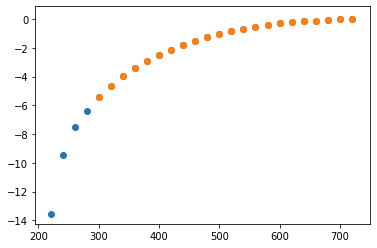

In [745]:
predict1 = plot_values[0][0:len(plot_values[0])-1]
predict2 = np.log(plot_values[1][0:len(plot_values[1])-1])
plt.scatter(predict1,predict2)
new_values = []
for i in zip(predict1,predict2):
    if i[1] < -6:
        continue
    else:
        new_values.append(i)
new_values = np.array(list(zip(*new_values)) ) 
plt.scatter(new_values[0],new_values[1])
check_values = get_Xmax(new_values[0],new_values[1])
print(check_values)
#check_values = get_Xmax(predict1,predict2)

[3.85069607e-05 1.84461009e-04 6.55290484e-04 1.87279579e-03
 4.53634926e-03 9.64816164e-03 1.84761733e-02 3.24513566e-02
 5.30129790e-02 8.14273860e-02 1.18610688e-01 1.64983496e-01
 2.20378395e-01 2.84010750e-01 3.54513114e-01 4.30024883e-01
 5.08322885e-01 5.86975712e-01 6.63504401e-01 7.35534136e-01
 8.00924952e-01 8.57873509e-01 9.04981971e-01 9.41293664e-01
 9.66297987e-01 9.79909108e-01]


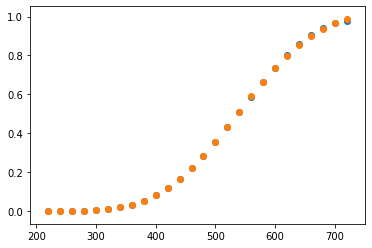

In [746]:
u = np.array(plot_values[0][0:len(plot_values[0])-1])
v = Gaisser_exp(u,check_values[0],check_values[1],check_values[2],check_values[3])
plt.scatter(u,v)
plt.scatter(u,plot_values[1][0:len(plot_values[1])-1])
plt.plot()
print(v)

In [721]:
y[906]

812.4674713499188

In [592]:
y

array([479.83162845, 479.83162845, 479.83162845, ..., 658.02546768,
       658.02546768, 658.02546768])

In [601]:
y[0:(y.shape[0]-2)].shape

(1637,)